In [1]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
data = files.upload()

Saving Real estate.csv to Real estate.csv


In [3]:
df = pd.read_csv('Real estate.csv')

In [4]:
# Defining Dependent and Independant variable
X = np.array(df[['X3 distance to the nearest MRT station','X2 house age']])
Y = df['Y house price of unit area'].values

In [6]:
X.shape

(414, 2)

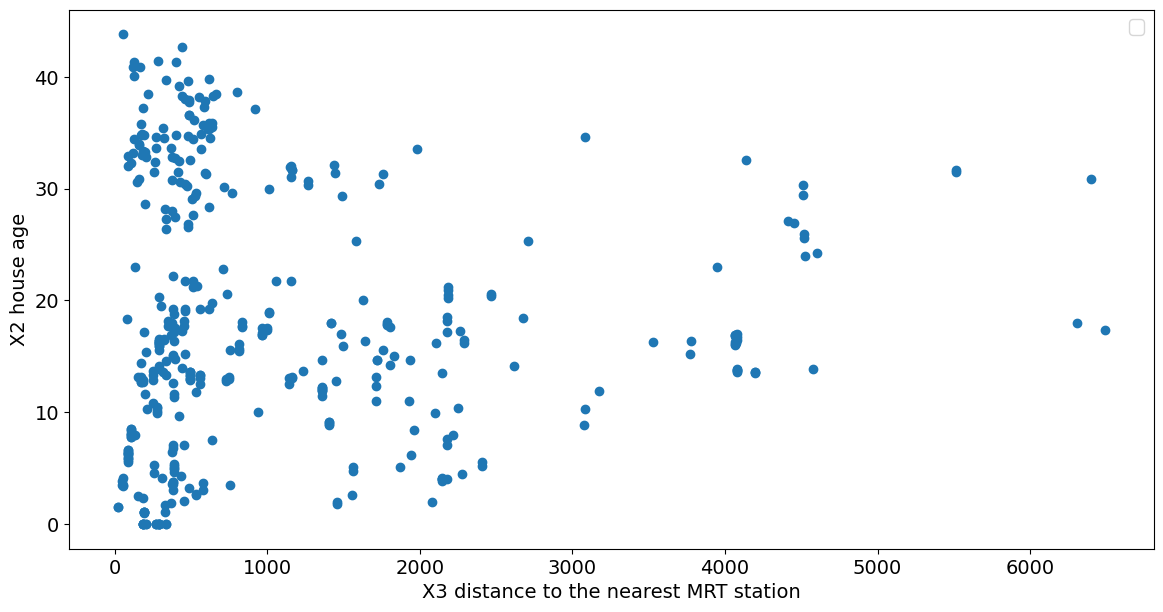

In [8]:
# Plotting the Clusters using matplotlib
plt.rcParams['figure.figsize'] = [14, 7]
plt.rc('font', size=14)

plt.scatter(df['X3 distance to the nearest MRT station'],df['X2 house age'])
plt.xlabel("X3 distance to the nearest MRT station")
plt.ylabel("X2 house age")
plt.legend()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import statistics
from scipy import stats

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(
 X, Y, test_size=0.30, random_state=42)

In [11]:
silhouette_coefficients = []

kmeans_kwargs= {
    "init":"random",
    "n_init":10,
    "max_iter":300,
    "random_state":42
}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(score)

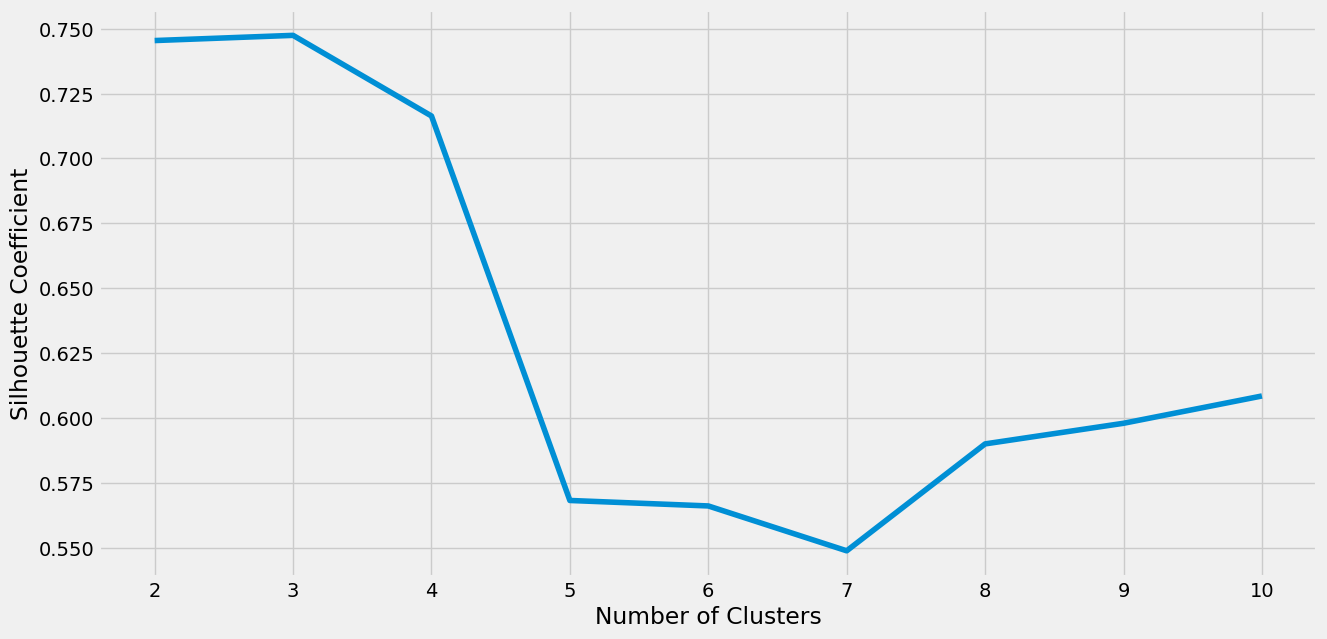

In [12]:
# Plotting graph to choose the best number of clusters
# with the most Silhouette Coefficient score

import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

The value of the silhouette coefﬁcient is between [-1, 1]. A score of 1 denotes the best, meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters. 

In [13]:
# Instantiate the model: KMeans from sklearn
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

# Fit to the training data
kmeans.fit(X_train)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [14]:
train_df = pd.DataFrame(X_train,columns=['X3 distance to the nearest MRT station','X2 house age'])

In [15]:
train_df.head(5)

X3 distance to the nearest MRT station  X2 house age
0                               287.60250          20.3
1                              3771.89500          15.2
2                                23.38284           1.5
3                              4573.77900          13.9
4                              1828.31900          15.0

In [16]:
# Generate out clusters
train_cluster = kmeans.predict(X_train)

In [17]:
# Add the target and predicted clusters to our training DataFrame
train_df.insert(2,'Y house price of unit area',Y_train) 
train_df.insert(3,'cluster',train_cluster)

In [18]:
train_df

X3 distance to the nearest MRT station  X2 house age  \
0                                 287.60250          20.3   
1                                3771.89500          15.2   
2                                  23.38284           1.5   
3                                4573.77900          13.9   
4                                1828.31900          15.0   
..                                      ...           ...   
284                               640.73910          35.5   
285                               189.51810          17.2   
286                               252.58220          10.8   
287                               259.66070           4.6   
288                               193.58450           1.1   

     Y house price of unit area  cluster  
0                          46.7        0  
1                          29.3        2  
2                          47.7        0  
3                          19.2        2  
4                          20.9        1  
..                          ...      ...  
284                        40.8        0  
285                        47.1        0  
286                       117.5        0  
287                        53.7        0  
288                        54.4        0  

[289 rows x 4 columns]

In [19]:
n_clusters=3
train_clusters_df = []
for i in range(n_clusters):
    train_clusters_df.append(train_df[train_df['cluster']==i])

In [20]:
train_clusters_df

[     X3 distance to the nearest MRT station  X2 house age  \
 0                                 287.60250          20.3   
 2                                  23.38284           1.5   
 6                                 157.60520          34.0   
 7                                 451.24380           2.1   
 8                                 815.93140          15.7   
 ..                                      ...           ...   
 284                               640.73910          35.5   
 285                               189.51810          17.2   
 286                               252.58220          10.8   
 287                               259.66070           4.6   
 288                               193.58450           1.1   
 
      Y house price of unit area  cluster  
 0                          46.7        0  
 2                          47.7        0  
 6                          39.1        0  
 7                          45.5        0  
 8                          38.1  

In [21]:
train_clusters_df[0]

X3 distance to the nearest MRT station  X2 house age  \
0                                 287.60250          20.3   
2                                  23.38284           1.5   
6                                 157.60520          34.0   
7                                 451.24380           2.1   
8                                 815.93140          15.7   
..                                      ...           ...   
284                               640.73910          35.5   
285                               189.51810          17.2   
286                               252.58220          10.8   
287                               259.66070           4.6   
288                               193.58450           1.1   

     Y house price of unit area  cluster  
0                          46.7        0  
2                          47.7        0  
6                          39.1        0  
7                          45.5        0  
8                          38.1        0  
..                          ...      ...  
284                        40.8        0  
285                        47.1        0  
286                       117.5        0  
287                        53.7        0  
288                        54.4        0  

[198 rows x 4 columns]

In [22]:
train_clusters_df[1]

X3 distance to the nearest MRT station  X2 house age  \
4                                  1828.319          15.0   
5                                  1626.083          20.0   
9                                  2147.376           4.0   
14                                 2707.392          25.3   
24                                 2103.555          16.2   
..                                      ...           ...   
255                                1962.628           8.4   
274                                2408.993           5.6   
278                                1156.777          32.0   
279                                1783.180          18.1   
282                                2275.877           4.5   

     Y house price of unit area  cluster  
4                          20.9        1  
5                          29.4        1  
9                          28.4        1  
14                         17.7        1  
24                         25.6        1  
..                          ...      ...  
255                        23.5        1  
274                        24.7        1  
278                        12.8        1  
279                        20.9        1  
282                        29.3        1  

[62 rows x 4 columns]

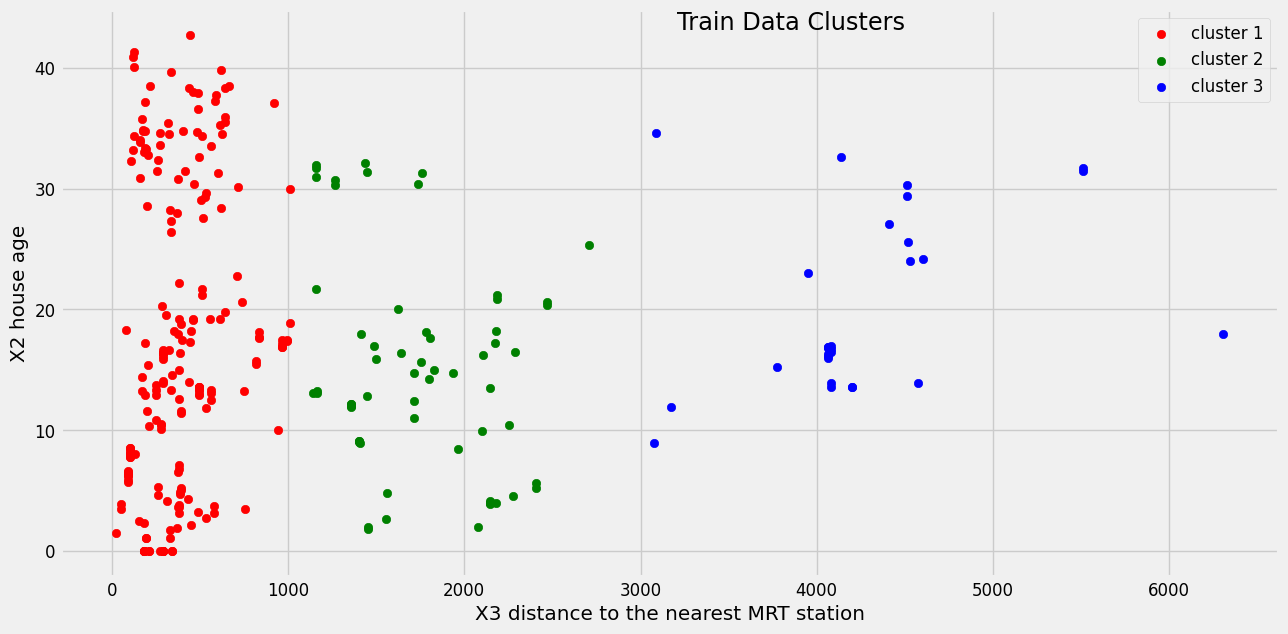

In [23]:
colors = ['red','green','blue']
plt.rcParams['figure.figsize'] = [14, 7]
plt.rc('font', size=12)

# Plot X_train again with features labeled by cluster
for i in range(n_clusters):
  subset = []
  for count,row in enumerate(X_train):
      if(train_cluster[count]==i):
        subset.append(row)

  x = [row[0] for row in subset]
  y = [row[1] for row in subset]
  plt.scatter(x,y,c=colors[i],label="cluster "+ str(i+1))
plt.title("Train Data Clusters", x=0.6, y=0.95)
plt.xlabel("X3 distance to the nearest MRT station")
plt.ylabel("X2 house age")
plt.legend()
plt.show()

In [ ]:
# Generate out clusters
train_cluster = kmeans.predict(X_train)

Building SVR for clusters

In [25]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR

n_clusters=3
cluster_svr = []
model = SVR(kernel='rbf', C=1000, epsilon=1)

for i in range(n_clusters):
    cluster_X = np.array((train_clusters_df[i])[['X3 distance to the nearest MRT station','X2 house age']])
    cluster_Y = (train_clusters_df[i])['Y house price of unit area'].values
    cluster_svr.append(model.fit(cluster_X, cluster_Y))

In [26]:
cluster_svr

[SVR(C=1000, epsilon=1), SVR(C=1000, epsilon=1), SVR(C=1000, epsilon=1)]

In [30]:
def regression_function(arr, kmeans, cluster_svr):
    result = []
    clusters_pred = kmeans.predict(arr)
    for i,data in enumerate(arr):
        result.append(((cluster_svr[clusters_pred[i]]).predict([data]))[0])
    return result,clusters_pred

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# calculating Y value and cluster
Y_svr_k_means_pred, Y_clusters = regression_function(X_test,
	kmeans, cluster_svr)

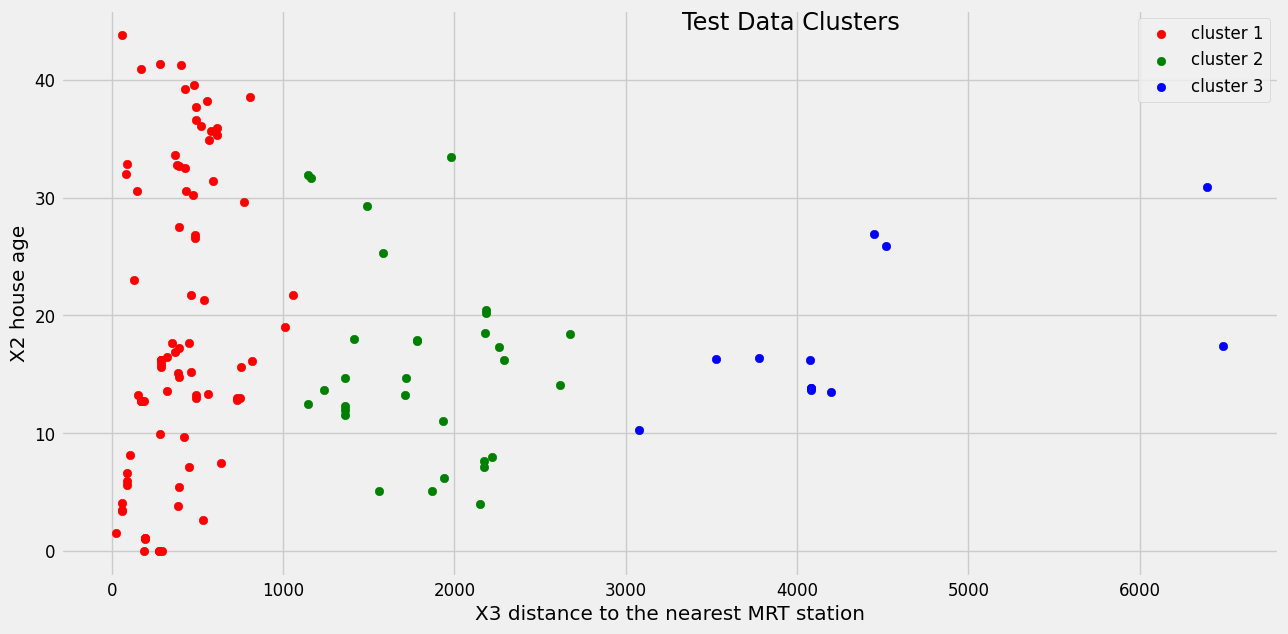

In [32]:
colors = ['red','green','blue']
plt.rcParams['figure.figsize'] = [14, 7]
plt.rc('font', size=12)

n_clusters=3

# Apply our model to clustering the remaining test set for validation

for i in range(n_clusters):
  subset = []
  for count,row in enumerate(X_test):
      if(Y_clusters[count]==i):
        subset.append(row)

  x = [row[0] for row in subset]
  y = [row[1] for row in subset]
  plt.scatter(x,y,c=colors[i],label="cluster "+ str(i+1))
plt.title("Test Data Clusters", x=0.6, y=0.95)
plt.xlabel("X3 distance to the nearest MRT station")
plt.ylabel("X2 house age")
plt.legend()
plt.show()

We can clearly see that we have got definite clusters for test data, and, also, got the Y value and have been stored in Y_svr_k_means_pred. Let us store the results and data into a data frame along with the cluster.

In [36]:
import pandas as pd

result_df = pd.DataFrame(X_test,columns=['X3 distance to the nearest MRT station','X2 house age'])
result_df['Y_true_value'] =  Y_test
result_df['YSVR_K_means'] = Y_svr_k_means_pred
result_df['cluster'] = Y_clusters
result_df.head()

X3 distance to the nearest MRT station  X2 house age  Y_true_value  \
0                                193.5845           1.1          45.1   
1                                492.2313          13.2          42.3   
2                                274.0144           0.0          52.2   
3                                170.1289          12.7          37.3   
4                               2185.1280          20.2          22.8   

   YSVR_K_means  cluster  
0     70.943672        0  
1     74.662003        0  
2     72.037664        0  
3     70.631881        0  
4     64.385493        1